In [1]:
#ME17B158 Assignment 2

## Data Analytics Lab (2nd Week)

### Probability Distribution, Moments, Visualisation, Data Generation, Parameter Estimation, Hypothesis Testing, Correlation

### Basic moments of one-dimensional data and visualisation

Implement functions to compute median, mode, sample mean, sample variance, standard deviation of one-dimensional data 
"without using numpy". 

Example :
data1 = np.array([1,2,3,4,5])

data1_median = median(data1)

data1_mode = mode(data1)

data1_mean = mean(data1)

data1_variance = variance(data1)

data1_stddev = stddev(data1)

In [2]:
# import dependencies
import numpy as np
import math
from collections import Counter
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [3]:
#Creating random datasets
d1 = [random.randint(1,1000) for i in range(1,100)]
d2 = [random.randint(-1000,1000) for i in range(1,100)]
d3 = [random.randint(1,10000) for i in range(1,1000)]
d4 = [random.randint(-10000,10000) for i in range(1,1000)]

Compute the above for different one-dimensional datasets - data1.txt, data2.txt, data3.txt, data4.txt and store as data1_median, data2_median etc. Verify the results using the numpy built in functions for mean,stddev and variance.

In [4]:
def moments(x):
    # mean
    custom_mean = sum(x)/len(x)
    numpy_mean = np.mean(x)
    print("Custom mean:",custom_mean,"; Numpy Mean:",numpy_mean)
    
    # median
    custom_median = x[int((len(x)-1)/2)] if len(x)%2==1 else (x[int(len(x)/2)]+x[int(((len(x)/2)-1)/2)])/2
    numpy_median = np.median(x)
    print("Custom median:",custom_median,"; Numpy Median:",numpy_median)
    
    # mode
    mode = Counter(x).most_common(1)[0][0]
    print("Mode:",mode)

    # variance
    custom_variance = sum([pow(ele-custom_mean,2) for ele in x])/len(x)
    numpy_variance = np.var(x)
    print("Custom variance:",custom_variance,"; Numpy variance:",numpy_variance)

    #stddev
    custom_stddev = math.sqrt(custom_variance)
    numpy_stddev = np.std(x)
    print("Custom Standard Devidation:",custom_stddev,"; Numpy Standard Devidation:",numpy_stddev,"\n")

In [5]:
#Testing
moments(d1)
moments(d2)
moments(d3)
moments(d4)

Custom mean: 442.62626262626264 ; Numpy Mean: 442.62626262626264
Custom median: 213 ; Numpy Median: 417.0
Mode: 521
Custom variance: 90920.23405774923 ; Numpy variance: 90920.23405774921
Custom Standard Devidation: 301.529822833081 ; Numpy Standard Devidation: 301.52982283308097 

Custom mean: -8.282828282828282 ; Numpy Mean: -8.282828282828282
Custom median: -378 ; Numpy Median: -89.0
Mode: 221
Custom variance: 278493.5967758392 ; Numpy variance: 278493.5967758392
Custom Standard Devidation: 527.7249252933191 ; Numpy Standard Devidation: 527.7249252933191 

Custom mean: 4950.457457457457 ; Numpy Mean: 4950.457457457457
Custom median: 9501 ; Numpy Median: 4927.0
Mode: 8446
Custom variance: 8419646.248190124 ; Numpy variance: 8419646.248190133
Custom Standard Devidation: 2901.6626696068797 ; Numpy Standard Devidation: 2901.662669606881 

Custom mean: 167.66166166166167 ; Numpy Mean: 167.66166166166167
Custom median: -2536 ; Numpy Median: 190.0
Mode: 8846
Custom variance: 33324955.312954

Visualize all the datasets (1-4) separately using matplotlib scatter plot and histograms. 

1. Comment on initial observations of distributions. 

2. For each dataset, specify which descriptive statistics best describe the data.

Example :

data1 - mean

data2 - mean

data3 - mean

data4 - mean

Hints: If you want to plot a known distribution (Normal,Unifrom, Exponential etc) using matplotlib, define it as a function 
and plot it. For this, you need to know the formula of the chosen distribution. If you dont know the exact distribution 
of a dataset, plot it as a histogram and smooth the data by converting bin edges to centres. Using seaborn library: 
    Install seaborn library and use $\texttt{distplot()}$ function to plot the distribution and verify the result.

In [6]:
# visualization by scatter plot
def scatter(x,s):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x, [i for i in range(0,len(x))])
    ax.set_title(('scatter plot of '+s))

In [7]:
# histogram plot
def histo(x,s):
    #bins = np.linspace(float(np.min(x)),float(np.max(x)),1000)
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    plt.hist(x, len(x), alpha=0.5, label=s)
    ax.set_title(('histogram plot of '+s))

In [8]:
d5 = np.random.normal(10,5,1000)

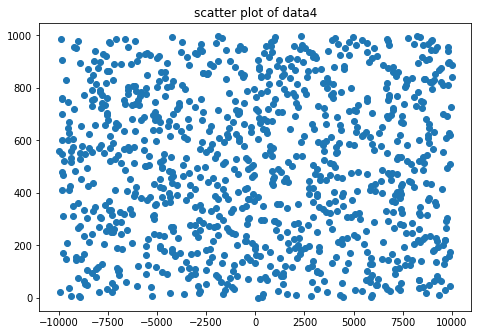

In [9]:
scatter(d4,"data4")

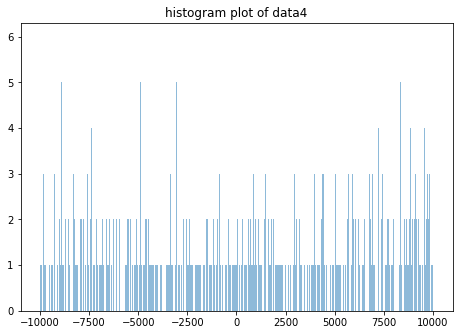

In [10]:
histo(d4,"data4")
#Upon obsercation, a uniform distribution is most appropriate for the given data set.
#The key defining parameter for a uniform disctribution is the mean

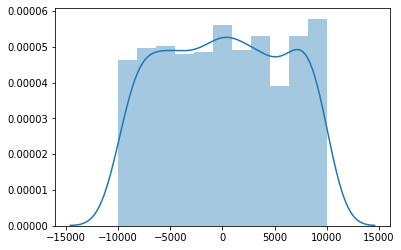

In [11]:
sns.distplot(d4);
#As seen here, there is agreement between our assessment and the result
#Note that this would also be the case for d1 to d3

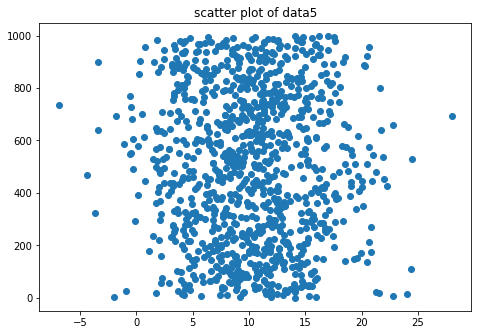

In [12]:
scatter(d5,"data5")

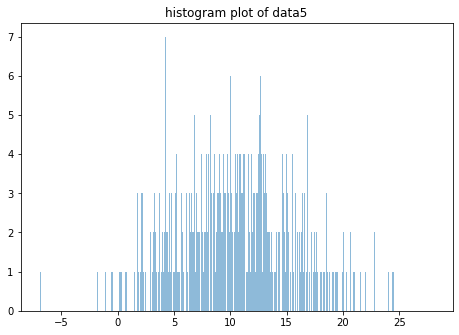

In [13]:
histo(d5,"data5")
#Upon observation, a gaussian distribution is a best fit for the given data
#Key defining parameters are mean, and standard deviation

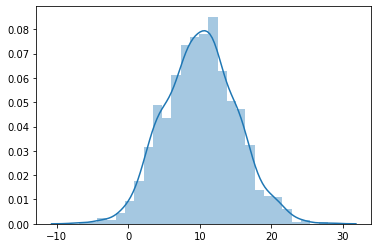

In [14]:
sns.distplot(d5)
#As seen by the normal distribution, there is agreement between our assessment and the result

The distribution fits a multimodal data. An appropriate measure of central tendency here is the median.

### Probability Distribution parameters and visualisation

Uniform Distribution: A uniform distribution, also called a rectangular distribution, is a probability distribution that has constant probability. This distribution is defined by two parameters, a and b: a is the minimum and b is the maximum.

Formula: 
\begin{align*}
f(x) = \frac{1}{b-a} , a \leq x \leq b
\end{align*}
Parameters:  $\text{Mean} = \frac{(a+b)}{2} ; \text{Variance} = \frac{1}{12(b-a)^2}$


Gaussian Distribution: The normal distribution is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. For mean, $\mu$ and standard deviation, $\sigma$, the formula is given as
\begin{align*}
f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
\end{align*}

Use the random.normal() method to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.

Given a normal distribution of mean = 3 and standard deviation = 1. 
1. Find $P(x\leq3)$ from the given distribution. 
2. Find the probability that $P(3\lt x\leq5)$ drawn from the given distribution. 
Write a function to estimate the above cumulative distribution function of a normal distribution. Verify the same.
 

In [15]:
# 1. Find  p(x<3)  from the given distribution

# 2. Find the probability that p(3<x<=5)  drawn from the given distribution

# Function for estimating cdf

def estimateCDF(x, a, b):
    """
    PARAMETERS:
    x : input 1D data
    a, b: data points at which cdf is to be estimated 
    
    RETURNS:
    cdf : cumulative distibution values s.t. P(a<x<=b)  
    """
    cdf = sum([1 if ((ele<=b) and (ele>a)) else 0 for ele in x])/len(x)
    
    return cdf

In [16]:
#Defining a normal distribution with mean 3 and std. dev. 1 and computing probabilites
d6 = np.random.normal(3,1,1000)
print("P(x<=3) = ",estimateCDF(d6, -10000, 3))
print("P(3<x<=5) = ",estimateCDF(d6, 3, 5))

P(x<=3) =  0.496
P(3<x<=5) =  0.48


### Maximum Likelihood Estimation for normal distribution : 
A method of estimating the parameters of a distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. For normal distribution, $f(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$, the goal is to determine $\mu$ and $\sigma$ for our data so that we can match our data to its most likely Gaussian bell curve. The estimated mean, $\hat{\mu}$ for normal distribution is  $\hat{\mu} = \frac{1}{n}\sum_{i=1}^nx_i$ and the estimated standard deviation is $\hat{\sigma} = \sqrt{ \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2}$.

Assuming that data1 has been sampled from normal distribution with unknown mean and standard deviation of 2, calculate $95\%$ confidence interval of data1_mean.

In [17]:
def confidence_interval(x, std, confidence):
    mean = np.mean(x)
    lim = std * st.t.ppf((1 + confidence) / 2., len(x)-1)
    return mean-lim, mean+lim

In [18]:
#Defining a normal distribution with mean 5 and std. dev. 2 and computing probabilites
d7 = np.random.normal(5,2,1000)
print("Confidence Interval",confidence_interval(d7, 2, 0.95))

Confidence Interval (1.0880378131054398, 8.937403657639234)


### Parameter estimation

In this section you will fit data to a standard distribution.

Normal distribution 
"DataSet1.txt" is to be fitted to normal distribution. Complete the function fitNormal() to estimate parameters.

In [19]:
def fitNormal(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    mu : mean of distribution
    sig : standard deviation of distribution
    """
    mu=float(x.mean())
    sig=float(x.std())
    
    return [mu, sig]
    

Read the file "DataSet1.txt" into a variable $\texttt{data1}$. Also plot a histogram of the same. Then pass it to $\texttt{fitNormal()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution. Use $\texttt{numpy.linspace()}$ to generate 1000 points in the range of $\texttt{data1}$. The probabilities are estimated from Gaussian distribution formula. Make a lineplot in the same figure.

<Figure size 720x576 with 0 Axes>

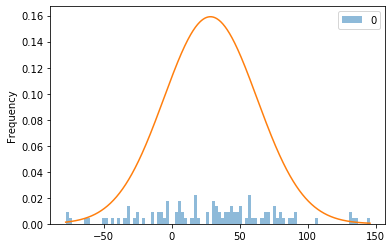

In [20]:
# Read datafile
data1= pd.read_csv('DataSet1.txt', header = None)

# Plot histogram of input data
plt.figure(figsize=[10,8])
data1.plot.hist(data1, len(data1), alpha=0.5, label='x',density=True)

# Fit data to normal distribution
x = np.linspace(float(data1.min()),float(data1.max()),1000)
mu,sig=fitNormal(data1)

# Generate data using estimated parameters for visualization and plot the same
def pdf_gaussian(x,mu,sig):
    return 1/(2*math.pi)*math.exp(-math.pow(x-mu,2)/(math.pow(sig,2)))
gaussian_func = lambda t: pdf_gaussian(t,mu,sig)
y = np.array([gaussian_func(xi) for xi in x])    
plt.plot(x,y)
plt.show()

"DataSet2.txt" is to be fitted to uniform distribution. Complete the function fitUniform() to estimate parameters. Generate and plot data as before.

In [21]:
def fitUniform(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    a : minimum value of distribution
    b : maximum value of distribution
    """
    a=float(x.min())
    b=float(x.max())
    
    return [a, b]

Read the file "DataSet2.txt" into a variable "data2". Also plot a histogram of the same. Then pass it to $\texttt{fitUniform()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution.

<Figure size 720x576 with 0 Axes>

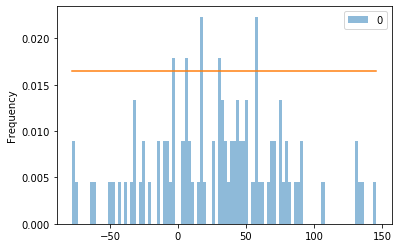

In [22]:
# Read datafile
data2= pd.read_csv('DataSet2.txt', header = None)

# Plot histogram of input data
plt.figure(figsize=[10,8])
data1.plot.hist(data2, len(data2), alpha=0.5, label='x',density=True)
bins = np.linspace(float(data1.min()),float(data1.max()),1000)

# Fit data to normal distribution
a,b=fitUniform(data2)


# Generate data using estimated parameters for visualization and plot the same
uniform_func = lambda t: pdf_uniform(t,a,b)
def pdf_uniform(x,a,b):
    return 1/(b-a);
y = np.array([uniform_func(xi) for xi in x])    
plt.plot(x,y)
plt.show()

## Correlation

In this section you are required to measure correlation between two variables. The dataset "**AirQualityData.csv**" contains daily readings of $\text{PM}_{10}$ and $O_3$ concentration in air along with temperature readings. To verify if the variation concentration of any of these pollutants is associated with temperature changes, measure the correlation between temperature and each of these pollutants. Complete the function $\texttt{correlationCoeff()}$ below that measures the correlation coefficient between two given time-series data. For a given n two data sets x and y, the Pearson coefficient formula is given as

\begin{align*}
    r_{xy} = \frac{cov(X,Y)}{\sigma(X)\cdot \sigma(Y)}
\end{align*}
$cov(X,Y) = \frac{\Sigma_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n-1}; \\ $ 
$\sigma(X), \sigma(Y)$ are respective standard deviations


In [23]:

def correlationCoeff(x, y):
    """
    PARAMETERS:
    x : input 1D data
    y : input 1D data
    
    RETURNS:
    est : coefficient value
    """
    est = np.corrcoef(x,y)[0][1]
    return est
    

Read the file "AirQualityData.csv" . Ignoring the "date" column, read columns "temp", "pm10" and "o3" as the dataframe as pass them to the function $\texttt{correlationCoeff()}$ to estimate seperately the effect of "pm10" on "temp" and "o3" on "temp". Which of the pollutants has a greater impact on temperature? Compare the value that you get from the above function with the python built in function $\texttt{df.corr()}$ . 

In [24]:
# Read datafile
data=pd.read_csv("AirQualityData.csv")
Corr_Coef=pd.DataFrame(columns=data.columns[1:])

# Estimate correlation
for i in data.columns[1:]:
    row=[]
    for j in data.columns[1:]:
        row.append(correlationCoeff(data[i],data[j]))
    temp=pd.DataFrame([row],columns=data.columns[1:],index=[i])
    Corr_Coef=pd.concat([Corr_Coef,temp])
Corr_Coef 

,temp,pm10,o3
temp,1.000000,0.362391,0.570239
pm10,0.362391,1.000000,0.333296
o3,0.570239,0.333296,1.000000


In [25]:
data.corr()

,temp,pm10,o3
temp,1.000000,0.362391,0.570239
pm10,0.362391,1.000000,0.333296
o3,0.570239,0.333296,1.000000


### Hypothesis Testing and Confidence Interval 

P Value: A p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results. This is also termed ‘probability value’ or ‘asymptotic significance’. The null hypothesis states that two measured phenomena experience no relationship to each other. We denote this as H or H0. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis.

Example: One such null hypothesis can be that the number of hours spent in the office affects the amount of salary paid. For a significance level of 5%, if the p-value falls lower than 5%, the null hypothesis is invalidated. Then it is discovered that the number of hours you spend in your office will not affect the amount of salary you will take home. 

T Test: Such a test tells us whether a sample of numeric data strays or differs significantly from the population. It also talks about two samples- whether they’re different. In other words, it gives us the probability of difference between populations.

In [26]:
# Install scipy library 
# import scipy.stats
# Use the function stats.ttest_ind() 

KS Test: KS Test in Python Statistics: This is the Kolmogorov-Smirnov test. It lets us test the hypothesis that the sample is a part of the standard t-distribution. Let’s take an example.

In [27]:
#Use the function stats.kstest(x,y) to compare the two distributions x and y 

In [28]:
#Example
#Generate 10,000 random data from a normal distribution of mean 0 and standard 1 with a random seed value of 10.
# Use KS test to compare the generated data to a normal distribution using kstest
#if the p-value is less than 0.05 or 5% (for a 95% confidence level), then the null hypothesis is rejected, 
#which means the generated data is not from the normal distribution

In [29]:
d8 = np.random.normal(0,1,10000)
stat, p = st.kstest(d8,'norm')
print("p value is: ",p,"\n","Rejected" if (p<0.05) else "Accepted")

p value is:  0.5431122939099102 
 Accepted


In [30]:
#Example 
# Generate 10,000 random data from a poisson distribution of lambda = 5
# Generate 7,000 random data from a poisson distribution of lambda = 7
# compare the mean of the two data sets using t test with a confidence level of 95%.

In [31]:
d9 = np.random.poisson(5,10000)
d10 = np.random.poisson(7,10000)
stat, p = st.ttest_ind(d9, d10) 
print("p value is: ",p)
print("Mean Comparision result is ",stat)

p value is:  0.0
Mean Comparision result is  -58.193871219540696
